In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import seaborn as sns

In [2]:
data=pd.read_csv('ML_Data.csv')

In [3]:
data=data.drop(['Z_jerk_mean', 'X_jerk_mean', 'total_jerk_mean', 'Y_jerk_mean','X_jerk_mean','X_jerk_min', 'X_min', 'timestamp_range', 'Y_mean', 'X_mean', 'X_max','Z_mean', 'X_jerk_max', 'X_jerk_range', 'X_range'], axis=1)

In [4]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [5]:
x=data.drop(['label'], axis=1)
y=data['label']

In [6]:
scale=StandardScaler()
x=scale.fit_transform(x)

In [7]:
x_train, x_t, y_train, y_t= train_test_split(x,y,test_size=0.3, random_state=42)
x_train.shape, x_t.shape

((2614, 29), (1121, 29))

In [8]:
x_val, x_test, y_val, y_test= train_test_split(x_t, y_t, test_size=0.15, random_state=42)
x_val.shape, x_test.shape

((952, 29), (169, 29))

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import Adam, SGD

2024-10-20 18:03:32.398131: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-20 18:03:32.399511: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-20 18:03:32.422682: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-20 18:03:32.422707: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-20 18:03:32.422723: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [10]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [11]:
model = Sequential([
    Dense(1024, activation='relu'),
    Dropout(0.7),
    Dense(512, activation='relu'),
    Dense(512, activation='tanh'),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(8, activation='softmax')
])

In [12]:
initial_learning_rate = 0.01
lr_schedule = ExponentialDecay(
    initial_learning_rate,      # Starting learning rate
    decay_steps=1000,         # How often to decay the learning rate
    decay_rate=0.96,            # The decay rate
    staircase=True              # Apply decay in discrete steps
)

# early_stopping = EarlyStopping(monitor='val_loss', patience=70, restore_best_weights=True)

In [13]:
# model.compile(optimizer=SGD(learning_rate=lr_schedule, 
#                             momentum=0.97, 
#                             nesterov=True),  # Enable Nesterov momentum
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#               metrics=['accuracy'])

In [14]:
model.compile(optimizer=Adam(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [15]:
history = model.fit(x_train, y_train,
                                epochs=500,
                                batch_size=64,
                                validation_data= (x_val, y_val),
                                verbose=2)

Epoch 1/500
41/41 - 1s - loss: 1.9298 - accuracy: 0.2177 - val_loss: 1.8415 - val_accuracy: 0.3025 - 1s/epoch - 26ms/step
Epoch 2/500
41/41 - 0s - loss: 1.7746 - accuracy: 0.2854 - val_loss: 1.7350 - val_accuracy: 0.3708 - 240ms/epoch - 6ms/step
Epoch 3/500
41/41 - 0s - loss: 1.6525 - accuracy: 0.3481 - val_loss: 1.5528 - val_accuracy: 0.4065 - 235ms/epoch - 6ms/step
Epoch 4/500
41/41 - 0s - loss: 1.5698 - accuracy: 0.3887 - val_loss: 1.5119 - val_accuracy: 0.4296 - 235ms/epoch - 6ms/step
Epoch 5/500
41/41 - 0s - loss: 1.4862 - accuracy: 0.4346 - val_loss: 1.4440 - val_accuracy: 0.4275 - 237ms/epoch - 6ms/step
Epoch 6/500
41/41 - 0s - loss: 1.4472 - accuracy: 0.4495 - val_loss: 1.4136 - val_accuracy: 0.4569 - 235ms/epoch - 6ms/step
Epoch 7/500
41/41 - 0s - loss: 1.3922 - accuracy: 0.4633 - val_loss: 1.3837 - val_accuracy: 0.4580 - 233ms/epoch - 6ms/step
Epoch 8/500
41/41 - 0s - loss: 1.3759 - accuracy: 0.4591 - val_loss: 1.3523 - val_accuracy: 0.5074 - 233ms/epoch - 6ms/step
Epoch 9/50

Epoch 67/500
41/41 - 0s - loss: 0.7854 - accuracy: 0.7173 - val_loss: 0.9670 - val_accuracy: 0.6964 - 235ms/epoch - 6ms/step
Epoch 68/500
41/41 - 0s - loss: 0.7414 - accuracy: 0.7288 - val_loss: 0.9222 - val_accuracy: 0.7069 - 233ms/epoch - 6ms/step
Epoch 69/500
41/41 - 0s - loss: 0.7247 - accuracy: 0.7334 - val_loss: 0.9242 - val_accuracy: 0.7059 - 235ms/epoch - 6ms/step
Epoch 70/500
41/41 - 0s - loss: 0.7518 - accuracy: 0.7200 - val_loss: 0.9320 - val_accuracy: 0.6838 - 231ms/epoch - 6ms/step
Epoch 71/500
41/41 - 0s - loss: 0.7357 - accuracy: 0.7276 - val_loss: 0.9388 - val_accuracy: 0.7048 - 232ms/epoch - 6ms/step
Epoch 72/500
41/41 - 0s - loss: 0.7014 - accuracy: 0.7448 - val_loss: 0.9242 - val_accuracy: 0.6996 - 233ms/epoch - 6ms/step
Epoch 73/500
41/41 - 0s - loss: 0.7400 - accuracy: 0.7307 - val_loss: 0.9035 - val_accuracy: 0.7006 - 236ms/epoch - 6ms/step
Epoch 74/500
41/41 - 0s - loss: 0.7174 - accuracy: 0.7410 - val_loss: 0.8864 - val_accuracy: 0.7059 - 236ms/epoch - 6ms/step


Epoch 133/500
41/41 - 0s - loss: 0.4801 - accuracy: 0.8240 - val_loss: 1.0617 - val_accuracy: 0.7153 - 242ms/epoch - 6ms/step
Epoch 134/500
41/41 - 0s - loss: 0.5038 - accuracy: 0.8148 - val_loss: 0.9777 - val_accuracy: 0.7248 - 243ms/epoch - 6ms/step
Epoch 135/500
41/41 - 0s - loss: 0.5203 - accuracy: 0.8148 - val_loss: 0.9697 - val_accuracy: 0.7300 - 239ms/epoch - 6ms/step
Epoch 136/500
41/41 - 0s - loss: 0.4984 - accuracy: 0.8091 - val_loss: 1.0004 - val_accuracy: 0.7216 - 241ms/epoch - 6ms/step
Epoch 137/500
41/41 - 0s - loss: 0.5138 - accuracy: 0.8198 - val_loss: 0.9985 - val_accuracy: 0.7342 - 241ms/epoch - 6ms/step
Epoch 138/500
41/41 - 0s - loss: 0.4933 - accuracy: 0.8229 - val_loss: 1.0066 - val_accuracy: 0.7290 - 239ms/epoch - 6ms/step
Epoch 139/500
41/41 - 0s - loss: 0.4777 - accuracy: 0.8233 - val_loss: 0.9799 - val_accuracy: 0.7290 - 238ms/epoch - 6ms/step
Epoch 140/500
41/41 - 0s - loss: 0.4703 - accuracy: 0.8213 - val_loss: 0.9628 - val_accuracy: 0.7384 - 244ms/epoch - 6

41/41 - 0s - loss: 0.3976 - accuracy: 0.8546 - val_loss: 1.0246 - val_accuracy: 0.7563 - 245ms/epoch - 6ms/step
Epoch 199/500
41/41 - 0s - loss: 0.3788 - accuracy: 0.8634 - val_loss: 0.9882 - val_accuracy: 0.7626 - 242ms/epoch - 6ms/step
Epoch 200/500
41/41 - 0s - loss: 0.3530 - accuracy: 0.8692 - val_loss: 0.9687 - val_accuracy: 0.7563 - 243ms/epoch - 6ms/step
Epoch 201/500
41/41 - 0s - loss: 0.3916 - accuracy: 0.8569 - val_loss: 1.0199 - val_accuracy: 0.7468 - 249ms/epoch - 6ms/step
Epoch 202/500
41/41 - 0s - loss: 0.3461 - accuracy: 0.8634 - val_loss: 1.0307 - val_accuracy: 0.7584 - 248ms/epoch - 6ms/step
Epoch 203/500
41/41 - 0s - loss: 0.3492 - accuracy: 0.8711 - val_loss: 1.0673 - val_accuracy: 0.7532 - 242ms/epoch - 6ms/step
Epoch 204/500
41/41 - 0s - loss: 0.3498 - accuracy: 0.8695 - val_loss: 1.0813 - val_accuracy: 0.7605 - 241ms/epoch - 6ms/step
Epoch 205/500
41/41 - 0s - loss: 0.3589 - accuracy: 0.8680 - val_loss: 1.0543 - val_accuracy: 0.7584 - 245ms/epoch - 6ms/step
Epoch 

Epoch 264/500
41/41 - 0s - loss: 0.2829 - accuracy: 0.8967 - val_loss: 1.1226 - val_accuracy: 0.7584 - 243ms/epoch - 6ms/step
Epoch 265/500
41/41 - 0s - loss: 0.2949 - accuracy: 0.8883 - val_loss: 1.1091 - val_accuracy: 0.7553 - 241ms/epoch - 6ms/step
Epoch 266/500
41/41 - 0s - loss: 0.3085 - accuracy: 0.8959 - val_loss: 1.1503 - val_accuracy: 0.7458 - 246ms/epoch - 6ms/step
Epoch 267/500
41/41 - 0s - loss: 0.2758 - accuracy: 0.8963 - val_loss: 1.1133 - val_accuracy: 0.7721 - 246ms/epoch - 6ms/step
Epoch 268/500
41/41 - 0s - loss: 0.2599 - accuracy: 0.9063 - val_loss: 1.1037 - val_accuracy: 0.7637 - 250ms/epoch - 6ms/step
Epoch 269/500
41/41 - 0s - loss: 0.2596 - accuracy: 0.9044 - val_loss: 1.0427 - val_accuracy: 0.7574 - 247ms/epoch - 6ms/step
Epoch 270/500
41/41 - 0s - loss: 0.2727 - accuracy: 0.9009 - val_loss: 1.1094 - val_accuracy: 0.7679 - 242ms/epoch - 6ms/step
Epoch 271/500
41/41 - 0s - loss: 0.2627 - accuracy: 0.9067 - val_loss: 1.1381 - val_accuracy: 0.7679 - 245ms/epoch - 6

41/41 - 0s - loss: 0.2407 - accuracy: 0.9124 - val_loss: 1.0806 - val_accuracy: 0.7679 - 250ms/epoch - 6ms/step
Epoch 330/500
41/41 - 0s - loss: 0.2277 - accuracy: 0.9193 - val_loss: 1.1691 - val_accuracy: 0.7763 - 249ms/epoch - 6ms/step
Epoch 331/500
41/41 - 0s - loss: 0.2397 - accuracy: 0.9151 - val_loss: 1.1223 - val_accuracy: 0.7721 - 248ms/epoch - 6ms/step
Epoch 332/500
41/41 - 0s - loss: 0.2346 - accuracy: 0.9178 - val_loss: 1.1482 - val_accuracy: 0.7742 - 248ms/epoch - 6ms/step
Epoch 333/500
41/41 - 0s - loss: 0.2102 - accuracy: 0.9216 - val_loss: 1.1386 - val_accuracy: 0.7721 - 251ms/epoch - 6ms/step
Epoch 334/500
41/41 - 0s - loss: 0.1970 - accuracy: 0.9273 - val_loss: 1.1907 - val_accuracy: 0.7700 - 250ms/epoch - 6ms/step
Epoch 335/500
41/41 - 0s - loss: 0.2277 - accuracy: 0.9158 - val_loss: 1.1642 - val_accuracy: 0.7626 - 246ms/epoch - 6ms/step
Epoch 336/500
41/41 - 0s - loss: 0.2064 - accuracy: 0.9258 - val_loss: 1.2140 - val_accuracy: 0.7647 - 250ms/epoch - 6ms/step
Epoch 

Epoch 395/500
41/41 - 0s - loss: 0.1995 - accuracy: 0.9285 - val_loss: 1.1677 - val_accuracy: 0.7626 - 250ms/epoch - 6ms/step
Epoch 396/500
41/41 - 0s - loss: 0.2070 - accuracy: 0.9288 - val_loss: 1.1429 - val_accuracy: 0.7742 - 250ms/epoch - 6ms/step
Epoch 397/500
41/41 - 0s - loss: 0.2101 - accuracy: 0.9250 - val_loss: 1.1886 - val_accuracy: 0.7605 - 248ms/epoch - 6ms/step
Epoch 398/500
41/41 - 0s - loss: 0.1936 - accuracy: 0.9304 - val_loss: 1.1672 - val_accuracy: 0.7658 - 245ms/epoch - 6ms/step
Epoch 399/500
41/41 - 0s - loss: 0.1756 - accuracy: 0.9399 - val_loss: 1.2298 - val_accuracy: 0.7542 - 246ms/epoch - 6ms/step
Epoch 400/500
41/41 - 0s - loss: 0.1896 - accuracy: 0.9331 - val_loss: 1.1939 - val_accuracy: 0.7647 - 252ms/epoch - 6ms/step
Epoch 401/500
41/41 - 0s - loss: 0.1863 - accuracy: 0.9315 - val_loss: 1.1724 - val_accuracy: 0.7679 - 251ms/epoch - 6ms/step
Epoch 402/500
41/41 - 0s - loss: 0.1838 - accuracy: 0.9353 - val_loss: 1.2253 - val_accuracy: 0.7752 - 246ms/epoch - 6

41/41 - 0s - loss: 0.1596 - accuracy: 0.9457 - val_loss: 1.2190 - val_accuracy: 0.7605 - 249ms/epoch - 6ms/step
Epoch 461/500
41/41 - 0s - loss: 0.1616 - accuracy: 0.9476 - val_loss: 1.2385 - val_accuracy: 0.7668 - 247ms/epoch - 6ms/step
Epoch 462/500
41/41 - 0s - loss: 0.1632 - accuracy: 0.9399 - val_loss: 1.1881 - val_accuracy: 0.7658 - 244ms/epoch - 6ms/step
Epoch 463/500
41/41 - 0s - loss: 0.1725 - accuracy: 0.9403 - val_loss: 1.2009 - val_accuracy: 0.7584 - 246ms/epoch - 6ms/step
Epoch 464/500
41/41 - 0s - loss: 0.1565 - accuracy: 0.9445 - val_loss: 1.2494 - val_accuracy: 0.7626 - 243ms/epoch - 6ms/step
Epoch 465/500
41/41 - 0s - loss: 0.1745 - accuracy: 0.9338 - val_loss: 1.2027 - val_accuracy: 0.7700 - 248ms/epoch - 6ms/step
Epoch 466/500
41/41 - 0s - loss: 0.1607 - accuracy: 0.9407 - val_loss: 1.2583 - val_accuracy: 0.7731 - 246ms/epoch - 6ms/step
Epoch 467/500
41/41 - 0s - loss: 0.1450 - accuracy: 0.9476 - val_loss: 1.2322 - val_accuracy: 0.7689 - 242ms/epoch - 6ms/step
Epoch 

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              30720     
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               3

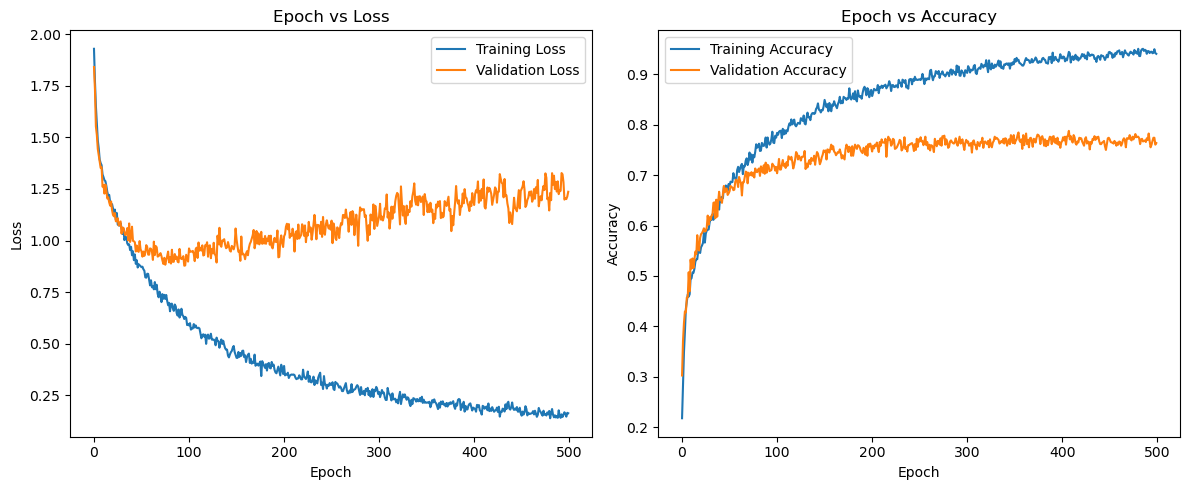

In [17]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [18]:
train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=0)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 98.70%
Test Accuracy: 79.29%


6/6 [==============================] - 0s 2ms/step


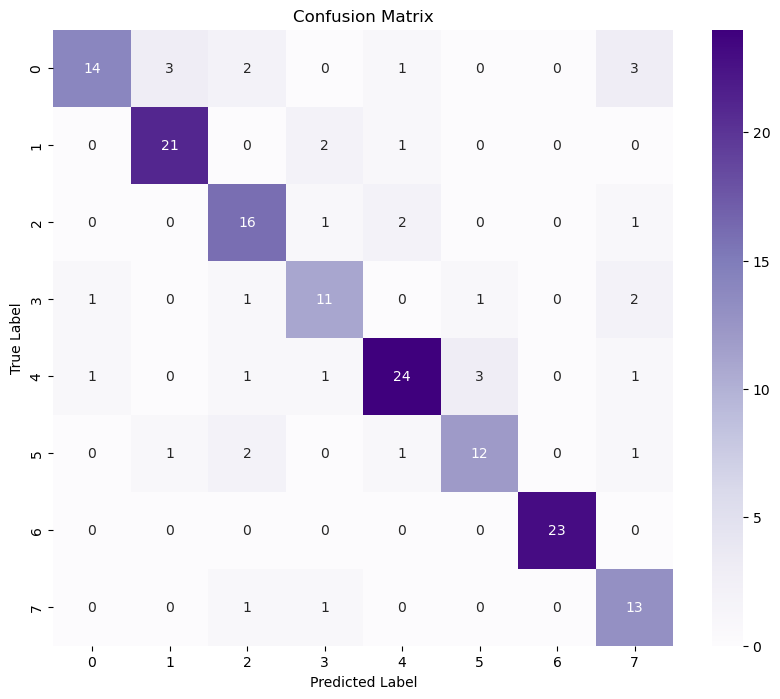

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.61      0.72        23
           1       0.84      0.88      0.86        24
           2       0.70      0.80      0.74        20
           3       0.69      0.69      0.69        16
           4       0.83      0.77      0.80        31
           5       0.75      0.71      0.73        17
           6       1.00      1.00      1.00        23
           7       0.62      0.87      0.72        15

    accuracy                           0.79       169
   macro avg       0.79      0.79      0.78       169
weighted avg       0.80      0.79      0.79       169



In [19]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

if len(y_test.shape) == 1 or y_test.shape[1] == 1:
    y_true = y_test  
else:
    y_true = np.argmax(y_test, axis=1)  


conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_true, y_pred_classes, target_names=[str(i) for i in range(len(np.unique(y_true)))])
print("Classification Report:")
print(class_report)
